#MNIST convnet

###**Importar Bibliotecas**

In [56]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline


###**Preparação dos Dados**

In [57]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


###**Acessar as imagens da base**

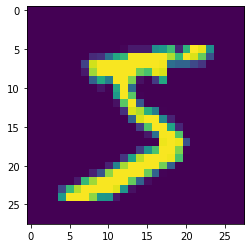

In [58]:
#access first image
first_image = x_train[0]
first_image = np.array(first_image)
pixels = first_image.reshape((28, 28))
plt.imshow(pixels)

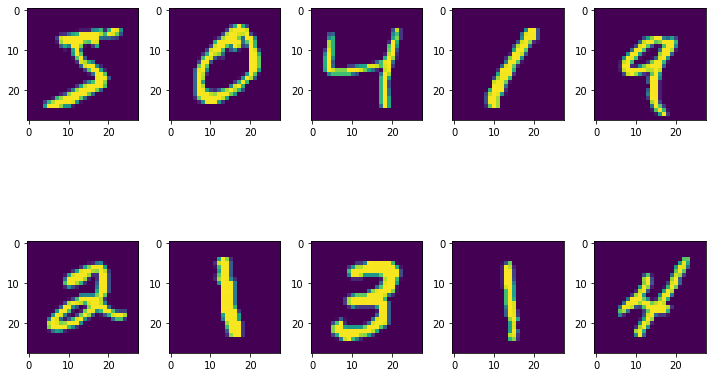

In [59]:
# Acessar as 10 primeiras imagens

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k=0
for i in range(2):
  for j in range (5):
    ax[i,j].imshow(x_train[k].reshape(28,28))
    k+= 1 
  plt.tight_layout()

### **Criando o Modelo**

In [60]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1600)             

### **Compilando o modelo**

In [61]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### **Treinando o modelo**

In [62]:
batch_size = 128
epochs = 18

history= model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/18
422/422 [==============================] - 3s 7ms/step - loss: 0.3697 - accuracy: 0.8867 - val_loss: 0.0813 - val_accuracy: 0.9772
Epoch 2/18
422/422 [==============================] - 2s 6ms/step - loss: 0.1093 - accuracy: 0.9670 - val_loss: 0.0555 - val_accuracy: 0.9855
Epoch 3/18
422/422 [==============================] - 2s 6ms/step - loss: 0.0813 - accuracy: 0.9752 - val_loss: 0.0433 - val_accuracy: 0.9880
Epoch 4/18
422/422 [==============================] - 2s 6ms/step - loss: 0.0673 - accuracy: 0.9799 - val_loss: 0.0395 - val_accuracy: 0.9887
Epoch 5/18
422/422 [==============================] - 2s 6ms/step - loss: 0.0618 - accuracy: 0.9806 - val_loss: 0.0372 - val_accuracy: 0.9897
Epoch 6/18
422/422 [==============================] - 2s 5ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0351 - val_accuracy: 0.9910
Epoch 7/18
422/422 [==============================] - 2s 6ms/step - loss: 0.0516 - accuracy: 0.9844 - val_loss: 0.0367 - val_accuracy: 0.9895
Epoch 

### **Representação gráfica dos resultados**

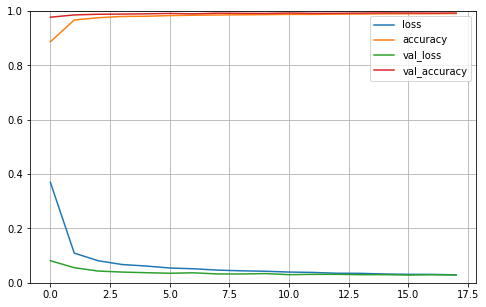

In [63]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1.0)
plt.show()


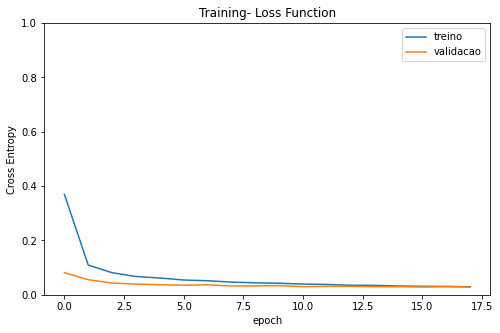

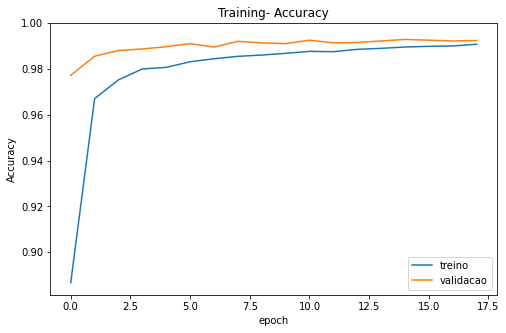

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validacao')
plt.legend()
plt.ylabel('Cross Entropy')
plt.xlabel('epoch')
plt.title('Training- Loss Function')
plt.ylim([0,1.0])
#plt.xlim([0,0.5])
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='treino')
plt.plot(history.history['val_accuracy'], label='validacao')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('Training- Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.show()


## Evaluate the trained model

In [65]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.020637651905417442
Test accuracy: 0.9923999905586243


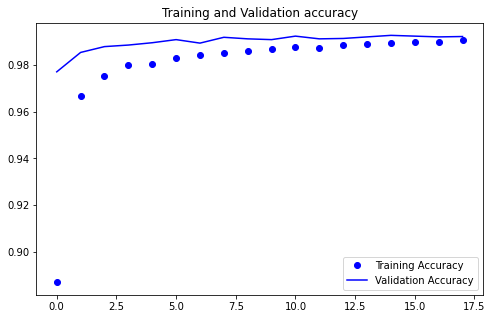

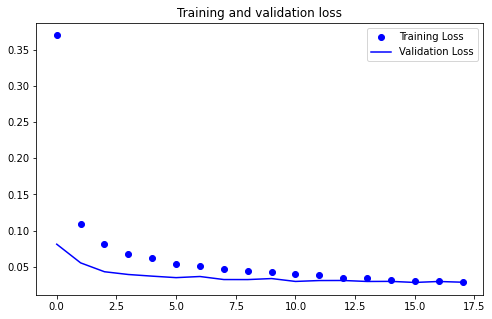

In [66]:
plt.figure(figsize=(8, 5))
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()